In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns


In [2]:
# you should clone this git to this subdirectory (in some directory - I call it BES_analysis - doesn't matter though)

if os.getcwd().split(os.sep)[-1] != 'BES_analysis_code':
    raise Exception("Stop! You're in the wrong directory - should be in 'BES_analysis_code'")

BES_code_folder   = "../BES_analysis_code/" # we should be here!
BES_small_data_files = BES_code_folder + "small data files" + os.sep
if not os.path.exists( BES_small_data_files ):
    os.makedirs( BES_small_data_files )

# we should create these if they don't already exist
BES_data_folder   = "../BES_analysis_data/"
if not os.path.exists( BES_data_folder ):
    os.makedirs( BES_data_folder )

BES_output_folder = "../BES_analysis_output/"
if not os.path.exists( BES_output_folder ):
    os.makedirs( BES_output_folder )

In [3]:
df = pd.read_csv( BES_small_data_files + "YouGov Cross-newspaper website readership.csv" )

In [4]:
df = df.replace(np.nan, 0)

In [5]:
df = df.rename(columns={'Unnamed: 0': 'destination_newspaper_website'})

In [6]:
df = df.set_index('destination_newspaper_website')

In [7]:
df

,FT,Guardian,Independent,i,Telegraph,Times,Daily Mail,Mirror,Sun,Express,Star
destination_newspaper_website,,,,,,,,,,,
FT,0.0,16.0,18.0,29.0,18.0,25.0,5.0,5.0,4.0,11.0,7.0
Guardian,70.0,0.0,84.0,80.0,59.0,56.0,27.0,33.0,18.0,39.0,25.0
Independent,48.0,56.0,0.0,74.0,43.0,37.0,16.0,27.0,15.0,32.0,20.0
i,22.0,19.0,27.0,0.0,9.0,13.0,4.0,8.0,4.0,11.0,9.0
Telegraph,57.0,37.0,48.0,44.0,0.0,49.0,26.0,18.0,20.0,51.0,18.0
Times,40.0,21.0,24.0,31.0,30.0,0.0,10.0,10.0,9.0,19.0,17.0
Daily Mail,38.0,34.0,40.0,36.0,57.0,42.0,0.0,45.0,47.0,78.0,58.0
Mirror,20.0,22.0,34.0,38.0,21.0,16.0,20.0,0.0,33.0,39.0,62.0
Sun,16.0,11.0,18.0,14.0,21.0,16.0,21.0,33.0,0.0,36.0,68.0


In [8]:
# df.div(df.sum(axis=1), axis=0)
node_size = df.sum(axis=1).values
df.sum(axis=1)

destination_newspaper_website
FT             138.0
Guardian       491.0
Independent    368.0
i              126.0
Telegraph      368.0
Times          211.0
Daily Mail     475.0
Mirror         305.0
Sun            254.0
Express        207.0
Star            79.0
dtype: float64

In [9]:
normdf = df.div(df.sum(axis=1), axis=0)
normdf

,FT,Guardian,Independent,i,Telegraph,Times,Daily Mail,Mirror,Sun,Express,Star
destination_newspaper_website,,,,,,,,,,,
FT,0.000000,0.115942,0.130435,0.210145,0.130435,0.181159,0.036232,0.036232,0.028986,0.079710,0.050725
Guardian,0.142566,0.000000,0.171079,0.162933,0.120163,0.114053,0.054990,0.067210,0.036660,0.079430,0.050916
Independent,0.130435,0.152174,0.000000,0.201087,0.116848,0.100543,0.043478,0.073370,0.040761,0.086957,0.054348
i,0.174603,0.150794,0.214286,0.000000,0.071429,0.103175,0.031746,0.063492,0.031746,0.087302,0.071429
Telegraph,0.154891,0.100543,0.130435,0.119565,0.000000,0.133152,0.070652,0.048913,0.054348,0.138587,0.048913
Times,0.189573,0.099526,0.113744,0.146919,0.142180,0.000000,0.047393,0.047393,0.042654,0.090047,0.080569
Daily Mail,0.080000,0.071579,0.084211,0.075789,0.120000,0.088421,0.000000,0.094737,0.098947,0.164211,0.122105
Mirror,0.065574,0.072131,0.111475,0.124590,0.068852,0.052459,0.065574,0.000000,0.108197,0.127869,0.203279
Sun,0.062992,0.043307,0.070866,0.055118,0.082677,0.062992,0.082677,0.129921,0.000000,0.141732,0.267717


In [10]:
import plotly.plotly as py
from plotly.graph_objs import *
import networkx as nx

In [11]:
ind = normdf.index
ind

Index(['FT', 'Guardian', 'Independent', 'i', 'Telegraph', 'Times',
       'Daily Mail', 'Mirror', 'Sun', 'Express', 'Star'],
      dtype='object', name='destination_newspaper_website')

In [12]:
normdf.loc[ind[1],ind[0]] # to/from

0.1425661914460285

In [13]:
G = nx.DiGraph( )
edge_width = []
for ind_from in ind:
    G.add_node(ind_from)
    for ind_to in ind:
        if normdf.loc[ ind_to , ind_from ] > 0.1:
            edge_width.append( normdf.loc[ ind_to , ind_from ] )
            G.add_edge( ind_from, ind_to, weight= float( normdf.loc[ ind_to , ind_from ] ) )


In [14]:
edge_width = edge_width / np.mean( edge_width )

In [15]:
normdf

,FT,Guardian,Independent,i,Telegraph,Times,Daily Mail,Mirror,Sun,Express,Star
destination_newspaper_website,,,,,,,,,,,
FT,0.000000,0.115942,0.130435,0.210145,0.130435,0.181159,0.036232,0.036232,0.028986,0.079710,0.050725
Guardian,0.142566,0.000000,0.171079,0.162933,0.120163,0.114053,0.054990,0.067210,0.036660,0.079430,0.050916
Independent,0.130435,0.152174,0.000000,0.201087,0.116848,0.100543,0.043478,0.073370,0.040761,0.086957,0.054348
i,0.174603,0.150794,0.214286,0.000000,0.071429,0.103175,0.031746,0.063492,0.031746,0.087302,0.071429
Telegraph,0.154891,0.100543,0.130435,0.119565,0.000000,0.133152,0.070652,0.048913,0.054348,0.138587,0.048913
Times,0.189573,0.099526,0.113744,0.146919,0.142180,0.000000,0.047393,0.047393,0.042654,0.090047,0.080569
Daily Mail,0.080000,0.071579,0.084211,0.075789,0.120000,0.088421,0.000000,0.094737,0.098947,0.164211,0.122105
Mirror,0.065574,0.072131,0.111475,0.124590,0.068852,0.052459,0.065574,0.000000,0.108197,0.127869,0.203279
Sun,0.062992,0.043307,0.070866,0.055118,0.082677,0.062992,0.082677,0.129921,0.000000,0.141732,0.267717


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\matplotlib\__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be re

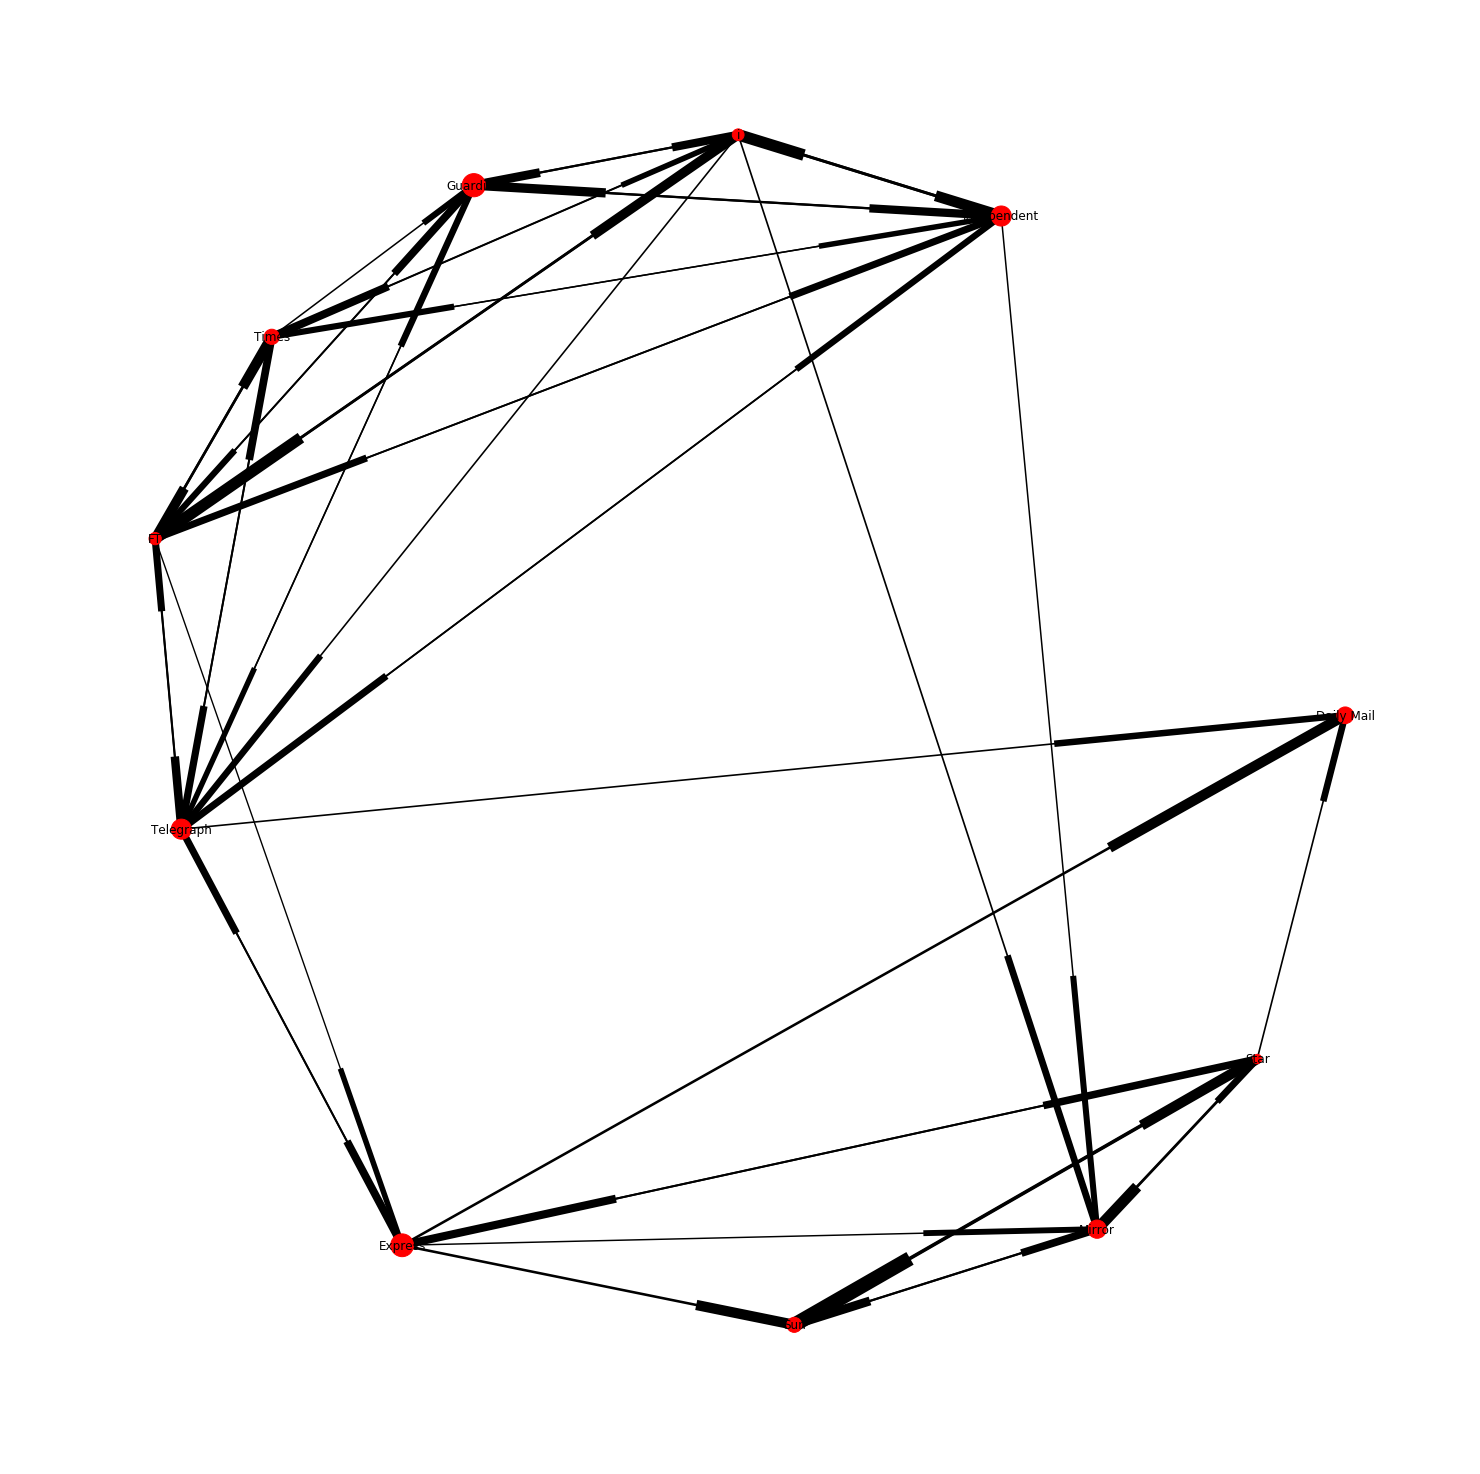

In [16]:
node_size = 300 * node_size/np.mean(node_size)


plt.figure(figsize=(20,20));
pos=nx.spring_layout(G,weight='weight')
nx.draw(G,pos, with_labels=True,node_size = node_size,width=2*edge_width)

In [20]:
import json
from networkx.readwrite import json_graph

for n in G:
    G.node[n]['name'] = n
    G.node[n]['popularity'] = float( df.sum(axis=1)[n] )
    for to in G.edge[n].keys():
        G.edge[n][to]['from'] = n

d = json_graph.node_link_data(G)
json.dump(d, open('force/force_crossnews/force.json','w'))

In [21]:
nx.write_graphml(G, "yougov_crossnews.graphml")  

In [ ]:
# from load_url import load_url
# load_url('force/force_crossnews/force.html')

In [ ]:
## should have kept better notes on the software (Gephi I think) and settings used to create the final nice looking graph!